<a href="https://colab.research.google.com/github/anirudh-g/Msc-Data-science/blob/master/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

In [1]:
!pip3 install detecto

In [2]:
!pip install torch==1.4

     |████████████████████████████████| 753.4MB 22kB/s 
ERROR: torchvision 0.7.0+cu101 has requirement torch==1.6.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101


In [3]:
!pip install torchvision==0.5.0

     |████████████████████████████████| 4.0MB 6.2MB/s 
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [64]:
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import load_model
import os
from google.colab import drive
from detecto import core, utils, visualize
from detecto.utils import read_image

In [66]:
#Replace the path with appropriate local or cloud dataset path before executing
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/objection detection')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOAD IMAGE

In [67]:
from google.colab import files
uploaded = files.upload()

In [69]:
path_to_image = 'swim2_wk8_fig017.png'

In [70]:
def load_image(img_path, show=False):
  
    img = image.load_img(img_path,target_size=(224,224))
    img_tensor = image.img_to_array(img)          
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

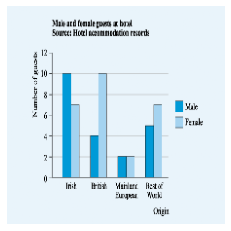

In [71]:
new_image = load_image(path_to_image, show=True)

BASELINE CNN

In [9]:
baseline = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/cnn baseline model')

In [50]:
classes = baseline.predict(new_image, verbose=1)

1/1 [==============================] - 0s 2ms/step


In [51]:
print(classes)

[[1.5465845e-18 2.9697824e-09 2.8352418e-27 1.0000000e+00 5.2790347e-20
  5.4333628e-30 0.0000000e+00]]


In [52]:
class_names=['AreaChart', 'BarChart', 'LineChart', 'ParetoChart', 'PieChart', 'RadarChart' ,'ScatterPlot' ]

In [53]:
def plot_image(predictions_array, input_img):
  img = input_img[0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(predictions_array)),
                                color='green')

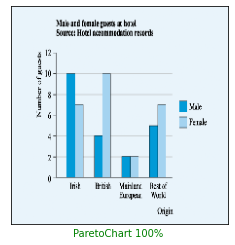

In [54]:
plot_image(classes[0], new_image)
plt.show()

# VGG16 - TRANSFER LEARNING

In [22]:
tl = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Transfer learning model')

In [55]:
classes_tl = tl.predict(new_image)

In [56]:
print(classes_tl)

[[4.3927706e-08 9.9999905e-01 1.0995642e-12 9.2240782e-07 1.1512648e-10
  1.7882193e-10 4.9117427e-10]]


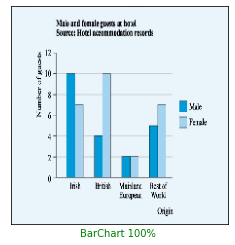

In [57]:
plot_image(classes_tl[0], new_image)
plt.show()

# OBJECT RECOGNITION

In [58]:
image2 = utils.read_image(path_to_image)

In [59]:
obj_det = core.Model.load('/content/drive/My Drive/Colab Notebooks/Obj det model noise/noise model.pth', ['title', 'legend', 'axis label'])

In [60]:
pred = obj_det.predict(image2)
label , box , score = pred

In [61]:
print(label)
print(box)
print(score)

['legend', 'title', 'axis label', 'axis label', 'legend']
tensor([[358.6308, 129.2641, 423.3347, 172.2893],
        [ 94.1817,  14.7150, 307.8936,  47.7365],
        [ 52.0243,  58.8347,  69.9674, 157.0437],
        [310.0494, 274.9494, 351.5155, 293.3158],
        [222.6490, 242.3298, 338.7647, 270.0212]])
tensor([0.9591, 0.8817, 0.8108, 0.5089, 0.0903])


In [62]:
images =[]
images.append(image2)

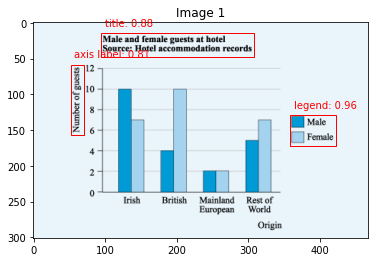

In [63]:
visualize.plot_prediction_grid(obj_det, images, score_filter=0.6)